In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('churn_prediction_cleaned.csv')
df.head()


,age,gender,dependents,occupation,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,66,Male,0.0,self_employed,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,35,Male,0.0,self_employed,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,31,Male,0.0,salaried,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,90,NaN,NaN,self_employed,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,42,Male,2.0,self_employed,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
df_clean = df.copy()

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     28382 non-null  int64  
 1   gender                  27857 non-null  object 
 2   dependents              25919 non-null  float64
 3   occupation              28302 non-null  object 
 4   customer_nw_category    28382 non-null  int64  
 5   current_balance         28382 non-null  float64
 6   current_month_credit    28382 non-null  float64
 7   previous_month_credit   28382 non-null  float64
 8   current_month_debit     28382 non-null  float64
 9   previous_month_debit    28382 non-null  float64
 10  current_month_balance   28382 non-null  float64
 11  previous_month_balance  28382 non-null  float64
 12  churn                   28382 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 2.8+ MB


In [5]:
df_clean.isnull().sum()

age                          0
gender                     525
dependents                2463
occupation                  80
customer_nw_category         0
current_balance              0
current_month_credit         0
previous_month_credit        0
current_month_debit          0
previous_month_debit         0
current_month_balance        0
previous_month_balance       0
churn                        0
dtype: int64

Tratamiento de missings

In [6]:
df_clean["gender"].fillna(method='bfill', inplace=True)

In [7]:
df_dependents_mean = int(df_clean["dependents"].mean())
df_clean["dependents"].fillna(df_dependents_mean, inplace=True)

In [8]:
df_clean["occupation"].fillna(method='bfill', inplace=True)

In [9]:
df_clean.describe()

,age,dependents,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,48.208336,0.317102,2.225530,7.380552e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,17.807163,0.958386,0.660443,4.259871e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,0.000000,1.000000,-5.503960e+03,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,36.000000,0.000000,2.000000,1.784470e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,46.000000,0.000000,2.000000,3.281255e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,60.000000,0.000000,3.000000,6.635820e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,90.000000,52.000000,3.000000,5.905904e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


Análisis de conjunto de datos

In [10]:
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    )

fig.add_trace(go.Box(x=df_clean['churn'], y=df_clean['age']))

fig.update_layout(xaxis_title='churn', yaxis_title='age')

fig.show()


Distribución de género en la data

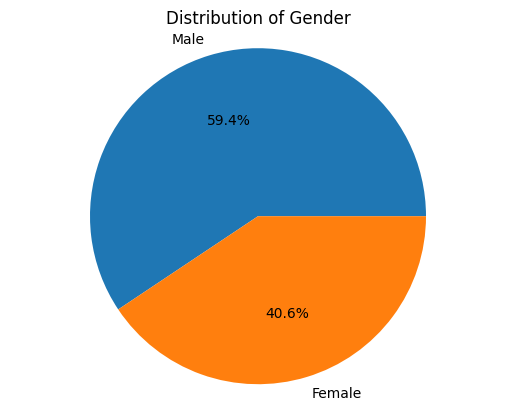

In [11]:
gender_counts = df_clean['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()


Cantidad de fuga por género

<AxesSubplot: xlabel='gender', ylabel='count'>

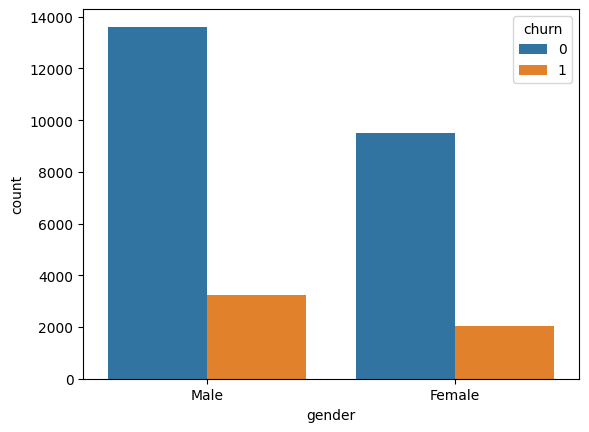

In [12]:
sns.countplot(data=df_clean, x='gender', hue='churn')

Cantidad de dependientes de clientes que fugaron

<AxesSubplot: title={'center': 'Cantidad de dependientes de clientes con abandono'}, xlabel='Dependents', ylabel='Cantidad'>

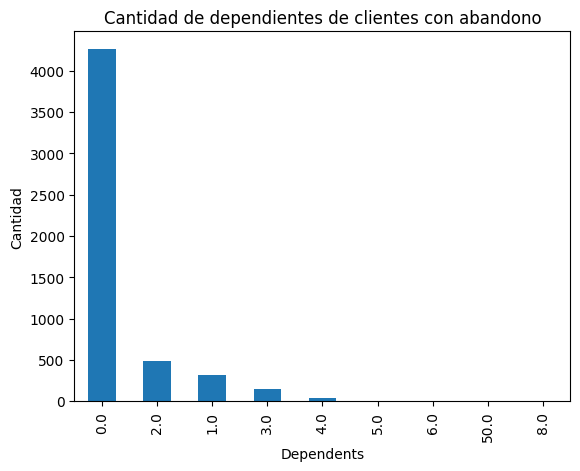

In [13]:
churned_clients = df_clean[df_clean['churn'] == 1]
dependents_churned = churned_clients['dependents'].value_counts()
dependents_churned.plot(kind='bar', xlabel='Dependents', ylabel='Cantidad',
                        title='Cantidad de dependientes de clientes con abandono')


Gráfico de barras para analizar occupation vs churn

<AxesSubplot: title={'center': 'Cantidad de clientes con abandono por ocupación'}, xlabel='occupation', ylabel='Cantidad'>

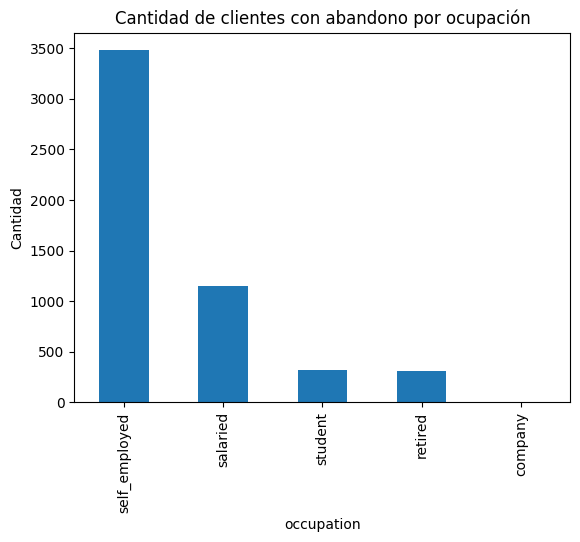

In [14]:
occupation_churned = churned_clients['occupation'].value_counts()
occupation_churned.plot(kind='bar', xlabel='occupation', ylabel='Cantidad', title='Cantidad de clientes con abandono por ocupación')


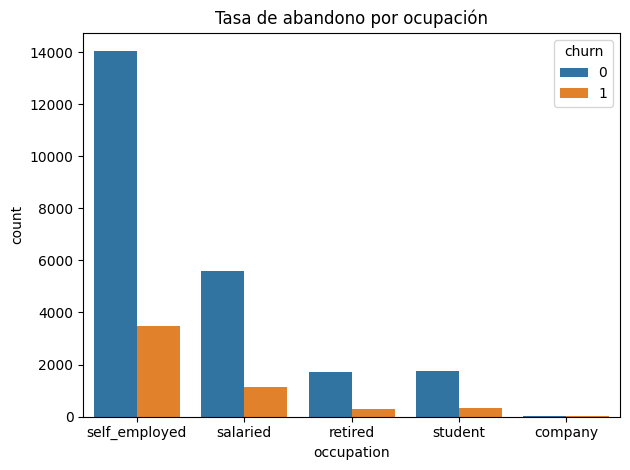

In [15]:
sns.countplot(x = 'occupation', hue = 'churn', data = df_clean)
plt.title('Tasa de abandono por ocupación')
plt.tight_layout()
plt.show()

Comparación del promedio balance de los clientes y su relacion con la fuga

In [16]:
df_sorted = df.sort_values(by='current_balance', ascending=False)
df_sorted["current_balance"].head(10)

9908     5905904.03
27856    1435872.80
23247    1398486.42
19977    1076091.29
23211    1064423.50
12712    1001960.31
10955     828201.44
28249     815323.98
18510     599743.49
5688      583534.68
Name: current_balance, dtype: float64

<AxesSubplot: title={'center': 'Promedio de Balance de los Clientes'}, xlabel='Churn', ylabel='Balance'>

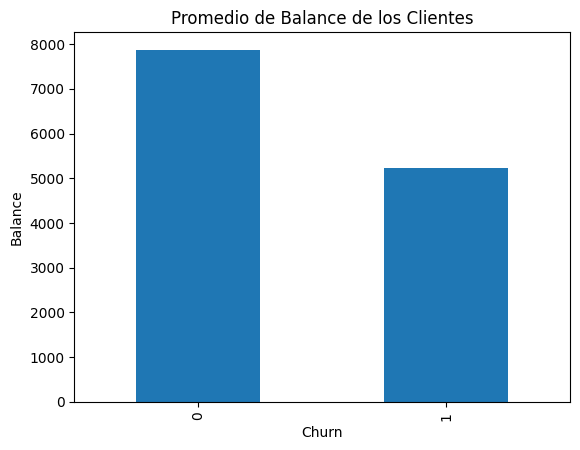

In [17]:
promedio_balance = df_clean.groupby('churn')['current_balance'].mean()
promedio_balance.plot(kind='bar', xlabel='Churn', ylabel='Balance', title='Promedio de Balance de los Clientes')

Categoría patrimonial del cliente vs fuga

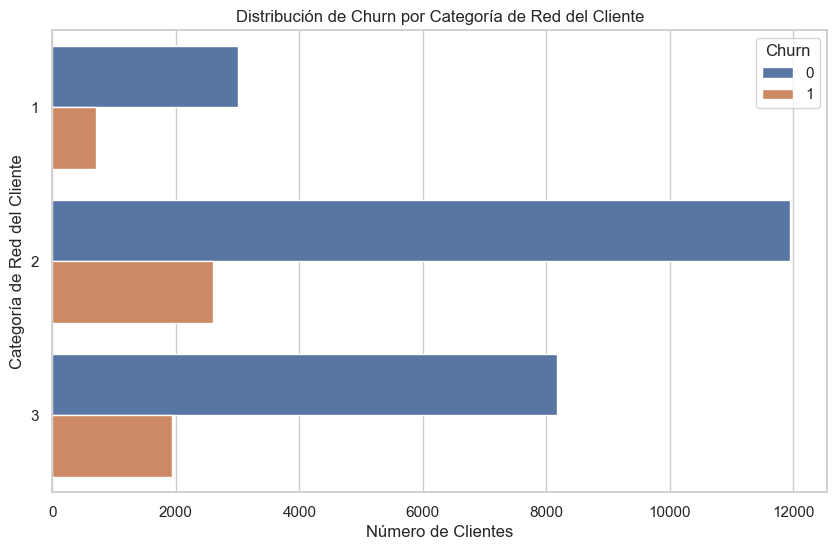

In [18]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))  
sns.countplot(data=df_clean, y='customer_nw_category', hue='churn')

plt.xlabel('Número de Clientes')
plt.ylabel('Categoría de Red del Cliente')
plt.title('Distribución de Churn por Categoría de Red del Cliente')

plt.legend(title='Churn', loc='upper right')
plt.show()


Matriz de correlacion

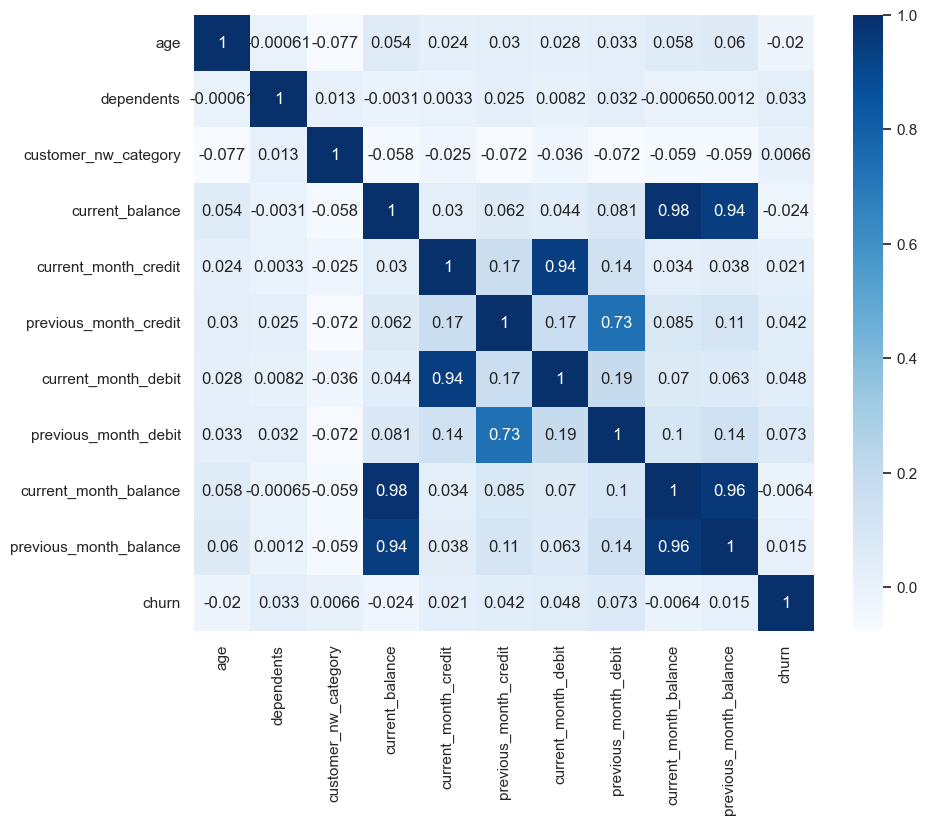

In [19]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()


Transformaciones de variables

In [20]:
df_clean["gender"].value_counts()

gender
Male      16848
Female    11534
Name: count, dtype: int64

In [21]:
df_clean["occupation"].value_counts()

occupation
self_employed    17521
salaried          6728
student           2062
retired           2031
company             40
Name: count, dtype: int64

In [22]:
gender_dummies = pd.get_dummies(df_clean["gender"],dtype=int)
occupation_dummies = pd.get_dummies(df_clean["occupation"],dtype=int)
occupation_dummies.head(2)

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0


In [23]:
df_clean = pd.concat([df_clean, gender_dummies, occupation_dummies], axis=1)
df_clean.drop(['gender', 'occupation'], axis=1, inplace=True)
df_clean.head()

,age,dependents,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
0,66,0.0,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0
1,35,0.0,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0
2,31,0.0,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0
3,90,0.0,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0
4,42,2.0,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0


In [24]:
df_clean["dependents"] = df_clean["dependents"].astype('int64')
df_clean.head()


,age,dependents,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
0,66,0,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0
1,35,0,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0
2,31,0,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0
3,90,0,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0
4,42,2,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0


División en conjunto de entrenamiento y prueba

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [26]:
X = df_clean.drop(['churn'], axis=1)
y = df_clean['churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estandarización de variables

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:

def evaluate_random_forest(max_leaf_nodes,criterion='gini',n_estimators=100):
    rf = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, criterion=criterion, 
                                n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    return classification_report(y_test, y_pred)

In [30]:
leaf_nodes = [100,300,500]

for i in leaf_nodes:
    print(f"Classification report for leaf_nodes = {i}")
    print(evaluate_random_forest(i))
    print("---------------------------------------------------------")

Classification report for leaf_nodes = 100
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.73      0.35      0.48      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.66      0.70      5677
weighted avg       0.84      0.86      0.84      5677

---------------------------------------------------------
Classification report for leaf_nodes = 300
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.73      0.38      0.50      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677

---------------------------------------------------------
Classification report for leaf_nodes = 500
              precision    recall  f1-score   support

           0       0.88      0.97      0.92   

In [31]:
criterions = ['gini','entropy','log_loss']

for i in criterions:
    print(f"Classification report for criterion = {i}")
    print(evaluate_random_forest(300,i))
    print("---------------------------------------------------------\n")

Classification report for criterion = gini
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.73      0.38      0.50      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677

---------------------------------------------------------

Classification report for criterion = entropy
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.74      0.38      0.50      1038

    accuracy                           0.86      5677
   macro avg       0.81      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677

---------------------------------------------------------

Classification report for criterion = log_loss
              precision    recall  f1-score   support

           0       0.87      0.97    

In [32]:
estimators = [100,200,300,400,500]
for i in estimators:
    print(f"Classification report for n_estimators = {i}")
    print(evaluate_random_forest(300,'entropy',i))
    # print("---------------------------------------------------------\n")

Classification report for n_estimators = 100
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.74      0.38      0.50      1038

    accuracy                           0.86      5677
   macro avg       0.81      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677

Classification report for n_estimators = 200
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.74      0.37      0.49      1038

    accuracy                           0.86      5677
   macro avg       0.81      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677

Classification report for n_estimators = 300
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.74      0.38      0.50      1038

    accuracy                           0.86    

Reconstruir el modelo con parametros optimos

In [33]:
modelo_rf = RandomForestClassifier(max_leaf_nodes=300, criterion='entropy', n_estimators=100, random_state=42)

In [34]:
modelo_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=300, random_state=42)

Analizando las variables significativas

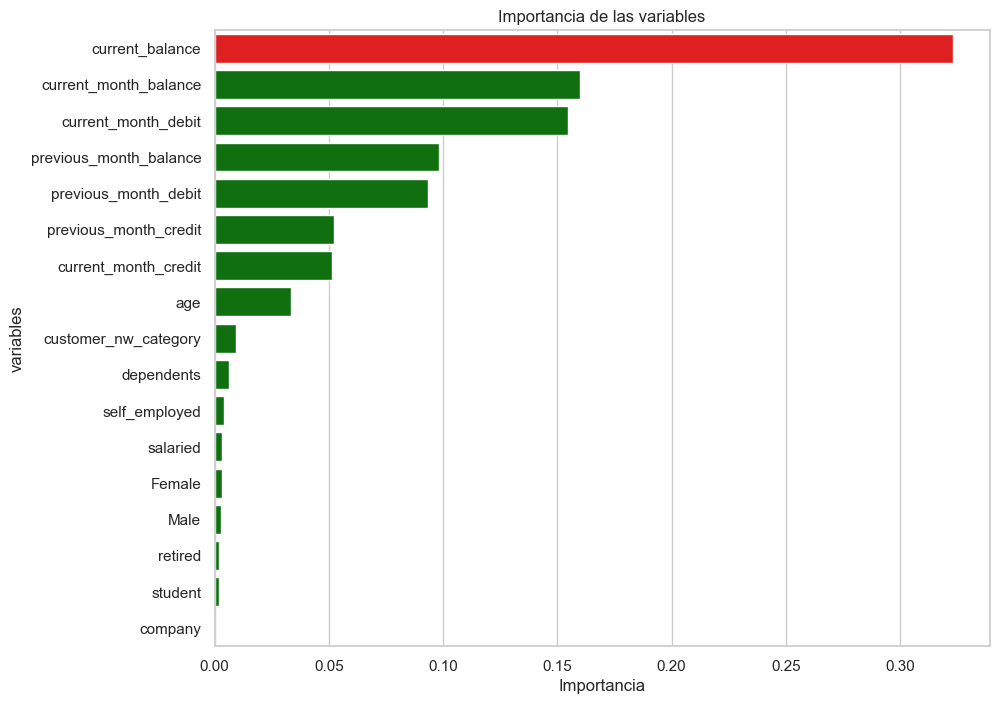

In [35]:
feat_dict= {}
for col, val in sorted(zip(X.columns, modelo_rf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val  
  
feat_df = pd.DataFrame({'variables':feat_dict.keys(),'Importancia':feat_dict.values()})

values = feat_df.Importancia    
idx = feat_df.variables
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Importancia de las variables')
plt.show()
    

In [36]:
variables_significativas = list(feat_df[feat_df['Importancia']>0.02].variables)
variables_significativas

['current_balance',
 'current_month_balance',
 'current_month_debit',
 'previous_month_balance',
 'previous_month_debit',
 'previous_month_credit',
 'current_month_credit',
 'age']

In [37]:
y_pred = modelo_rf.predict(X_test_scaled)

In [38]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.6728795945907219


In [39]:
print(accuracy_score(y_test, y_pred))

0.8613704421349304


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4639
           1       0.74      0.38      0.50      1038

    accuracy                           0.86      5677
   macro avg       0.81      0.67      0.71      5677
weighted avg       0.85      0.86      0.84      5677



Construcción de modelo con variables significativas

In [41]:
X = df_clean[variables_significativas]
y = df_clean['churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:

modelo_rf = RandomForestClassifier(max_leaf_nodes=300, criterion='entropy', n_estimators=100, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
modelo_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=300, random_state=42)

In [46]:
y_pred = modelo_rf.predict(X_test_scaled)

In [47]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6821835149011003

In [48]:
print(accuracy_score(y_test, y_pred))

0.8631319358816276


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4639
           1       0.73      0.40      0.51      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.68      0.72      5677
weighted avg       0.85      0.86      0.85      5677



Reducción de dimensionalidad PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca.shape


(28382, 2)

In [51]:
dataframe_columns = list(X.columns)
df_comp = pd.DataFrame(pca.components_, index=["PC1","PC2"],columns=dataframe_columns)
df_comp


,current_balance,current_month_balance,current_month_debit,previous_month_balance,previous_month_debit,previous_month_credit,current_month_credit,age
PC1,0.051022,0.055731,0.546325,0.056678,0.050177,0.066128,0.828080,0.000006
PC2,0.577027,0.573124,-0.040351,0.570741,0.038029,0.036412,-0.091781,0.000014


In [52]:
pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_)

0.8854376144959394

In [53]:
varianza_explicada = []
for n in range(1,len(X.columns)+1):
 pca = PCA(n_components=n)
 pca.fit(X)
 varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varianza Explicada')

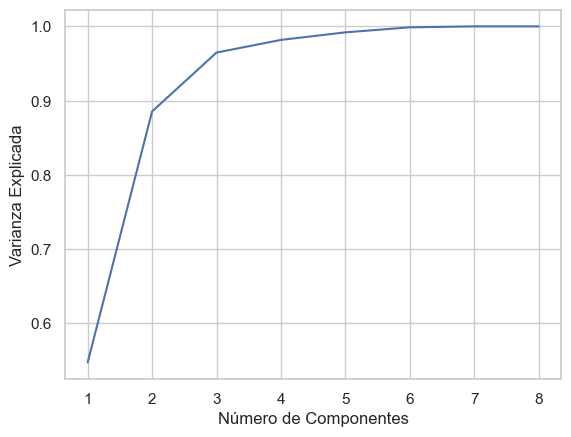

In [54]:
plt.plot(range(1,len(X.columns)+1),varianza_explicada)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')

In [55]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
pca_3.explained_variance_ratio_
np.sum(pca_3.explained_variance_ratio_)

0.9647116017663908

In [56]:
df_comp_3 = pd.DataFrame(pca_3.components_, index=["PC1","PC2","PC3"],columns=dataframe_columns)
df_comp_3

,current_balance,current_month_balance,current_month_debit,previous_month_balance,previous_month_debit,previous_month_credit,current_month_credit,age
PC1,0.051022,0.055731,0.546325,0.056678,0.050177,0.066128,0.828080,0.000006
PC2,0.577027,0.573124,-0.040351,0.570741,0.038029,0.036412,-0.091781,0.000014
PC3,-0.068811,-0.039216,-0.013996,0.003978,0.602311,0.789764,-0.083725,0.000011


In [57]:
X_esc_12 = pca_3.transform(X)
X_esc_12.shape
np.savetxt("X_esc_3.csv", X_esc_12, delimiter=",")
